In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [3]:
class LinearRegression:
    def __init__(self):
        self.theta = None

    def fit_pseudo_inverse(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.theta = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        

    def predict(self, X):
        # print(X, "x shape", self.theta.shape)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

    def r_squared(self, y_true, y_pred):
        mean_y = np.mean(y_true)
        total_variation = np.sum((y_true - mean_y)**2)
        residual_variation = np.sum((y_true - y_pred)**2)
        r2 = 1 - (residual_variation / total_variation)
        return r2

    def accuracy(self, y_true, y_pred):
        return self.r_squared(y_true, y_pred)

    def plot_regression_line(self, X, y, title):
        plt.scatter(X, y, color='blue', label='Data Points')
        plt.plot(X, self.predict(X), color='red', label='Regression Line')
        plt.title(title)
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
        plt.show()

    def plot_correlation_matrix(self, data):
        correlation_matrix = data.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix')
        plt.show()

In [11]:
from sklearn.metrics import r2_score


data = pd.read_csv('./data/Real estate.csv')
data.drop('No', axis=1, inplace=True)
data.head()

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(data.shape)
data.head()


(414, 7)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


<Axes: xlabel='Y house price of unit area', ylabel='Count'>

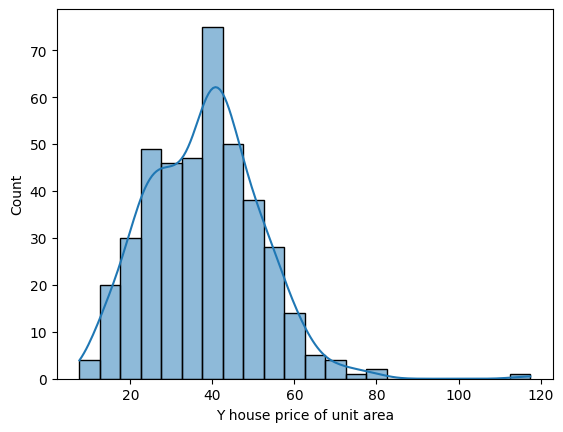

In [6]:
sns.histplot(data=data, x="Y house price of unit area", kde=True)

<Axes: >

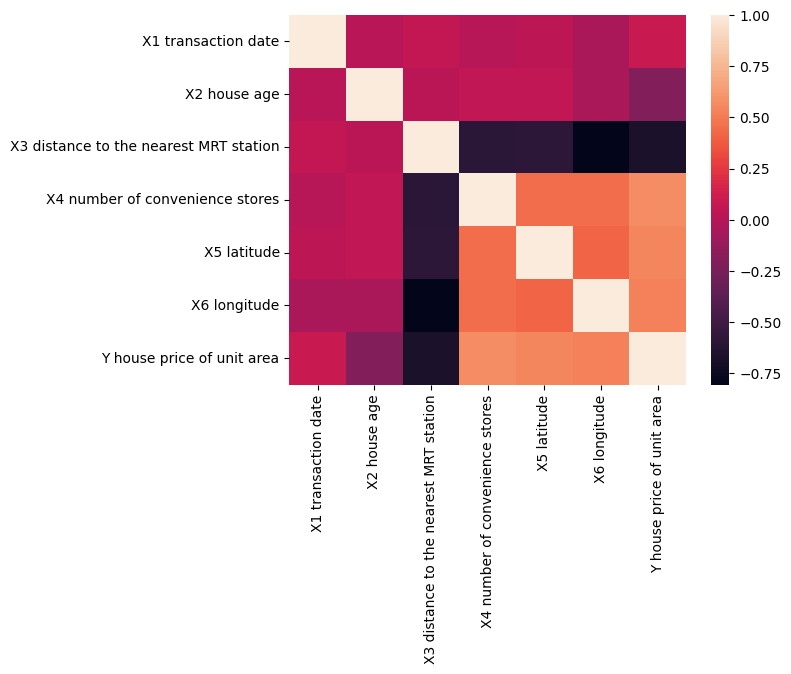

In [5]:
# # Plot the regression line
# model.plot_regression_line(X_test, y_test)

sns.heatmap(data.corr())

## The Moore-Penrose pseudoinverse

In the linear least squares context, the system: 
$$
W=A^{+}y=(A^{T}A)^{−1}A^{T}y
$$
i.e. the Moore-Penrose psuedoinverse of A
 applied to y
, is referred to as the normal equations.

In [6]:

# X_train

# Make predictions on the test set
# Pseudo Inverse Method
model_pseudo = LinearRegression()
model_pseudo.fit_pseudo_inverse(X_train, y_train)
y_pred_pseudo = model_pseudo.predict(X_test)
r2_pseudo = r2_score(y_test, y_pred_pseudo)
# r2_pseudo = model_pseudo.r_squared(y_test, y_pred_pseudo)
mse = model_pseudo.mean_squared_error(y_test, y_pred_pseudo)
print(y_pred_pseudo)
print(f"Mean Squared Error", mse)
print(f'R-squared (Pseudo Inverse): {r2_pseudo}')
mse2 = mean_squared_error(y_test, y_pred_pseudo)

[41.72171139 13.02813932 41.47317093 12.8622383  43.16164029 39.30563823
 40.39336519 34.50140218 48.54059446 45.12561482 45.69570324 41.62422117
 41.17110518 40.23413425 47.19446554 37.37449034 39.43983536 42.72304396
 41.47880057 42.44172372 50.37235235 29.73521064 39.5162574  45.22396929
 45.80567913 43.42226146 45.4711287  27.92781537 47.67588055 17.21663089
 44.78945941 33.48817626 44.19584578 36.75492949 43.8163644  30.57592967
 47.52817693 40.64464356 52.90584164  8.39242924 51.9119396  33.78107625
 35.81223619 49.00455353 15.44254897 43.87884921 42.93264108 13.93489602
 34.6631301  48.92020001 53.13799202 39.31862083 48.00690219 25.8415925
 29.46147804 33.99990706 48.29714803 40.56546151 44.01426519 32.1035683
 43.22805714 43.01323678 40.81313887 46.9125039  37.59966932 30.96745281
 10.84922584 35.30156952 46.39890114 39.30563823 30.1117861  46.29127259
 44.42918892 32.21470783 39.81857364 36.77781343 32.86325726 14.064484
 46.33842092 43.89315807 46.17785146 28.12095295 42.784

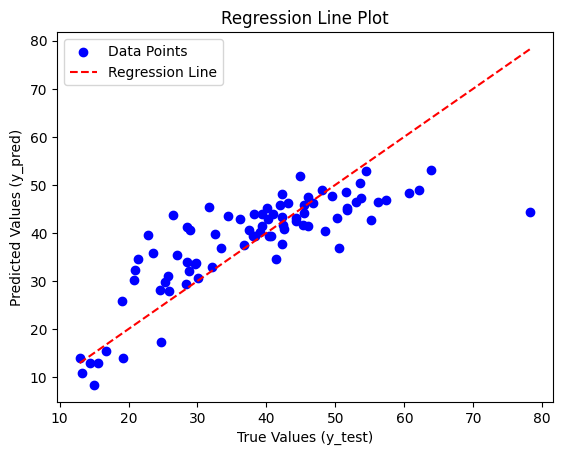

In [7]:
# Plotting the regression line
plt.scatter(y_test, y_pred_pseudo, color='blue', label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Regression Line')
plt.title('Regression Line Plot')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
predicted = model.predict(X_test)
ms = mean_squared_error(y_test, predicted)
print(ms)
print(r2_score(y_test, predicted))

59.52243531902366
0.6573242742218104
